# Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
sns.set('notebook')

In [3]:
data = pd.read_csv('data/credit.csv')
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
#Dimension of the dataset
data.shape

(100000, 28)

Analyse the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

Dataset contains 21 numerical columns and 7 categorical coumns. Credit_score is the target column.

In [6]:
data.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

In [7]:
data.describe(include = 'all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,100000.000000,100000,100000.000000,1.000000e+05,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000,100000.00000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000,100000.000000,100000
unique,NaN,NaN,NaN,10128,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,6261,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,3,NaN,NaN,6,NaN,3
top,NaN,NaN,NaN,Jessicad,NaN,NaN,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,No Data,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,NaN,NaN,NaN,48,NaN,NaN,7096,NaN,NaN,NaN,NaN,NaN,NaN,11408,NaN,NaN,NaN,NaN,45848,NaN,NaN,NaN,52326,NaN,NaN,28616,NaN,53174
mean,80631.500000,25982.666640,4.500000,NaN,33.316340,5.004617e+08,NaN,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,NaN,21.08141,13.313120,10.470323,5.798250,NaN,1426.220376,32.285173,221.220460,NaN,107.699208,55.101315,NaN,392.697586,NaN
std,43301.486619,14340.543051,2.291299,NaN,10.764812,2.908267e+08,NaN,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,NaN,14.80456,6.237166,6.609481,3.867826,NaN,1155.129026,5.116875,99.680716,NaN,132.267056,39.006932,NaN,201.652719,NaN
min,5634.000000,1006.000000,1.000000,NaN,14.000000,8.134900e+04,NaN,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,NaN,0.00000,0.000000,0.500000,0.000000,NaN,0.230000,20.000000,1.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,43132.750000,13664.500000,2.750000,NaN,24.000000,2.451686e+08,NaN,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,NaN,10.00000,9.000000,5.380000,3.000000,NaN,566.072500,28.052567,144.000000,NaN,29.268886,27.959111,NaN,267.615983,NaN
50%,80631.500000,25777.000000,4.500000,NaN,33.000000,5.006886e+08,NaN,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,NaN,18.00000,14.000000,9.400000,5.000000,NaN,1166.155000,32.305784,219.000000,NaN,66.462304,45.156550,NaN,333.865366,NaN
75%,118130.250000,38385.000000,6.250000,NaN,42.000000,7.560027e+08,NaN,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,NaN,28.00000,18.000000,14.850000,8.000000,NaN,1945.962500,36.496663,302.000000,NaN,147.392573,71.295797,NaN,463.215683,NaN


In [8]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [9]:
#checking for duplicate rows
data.duplicated().sum()


0

In [10]:
data.drop(['Customer_ID','ID','Name','SSN'],axis=1,inplace=True)#Drop unwanted columns

Credit score is the Target column,checking percentage of each values

In [11]:
data['Credit_Score'].value_counts(normalize=True) * 100


Credit_Score
Standard    53.174
Poor        28.998
Good        17.828
Name: proportion, dtype: float64

In [12]:
data['Credit_Mix'].value_counts(normalize=True) * 100

Credit_Mix
Standard    45.848
Good        30.384
Bad         23.768
Name: proportion, dtype: float64

In [13]:
data['Payment_Behaviour'].value_counts(normalize=True) * 100

Payment_Behaviour
Low_spent_Small_value_payments      28.616
High_spent_Medium_value_payments    19.738
High_spent_Large_value_payments     14.726
Low_spent_Medium_value_payments     14.399
High_spent_Small_value_payments     11.764
Low_spent_Large_value_payments      10.757
Name: proportion, dtype: float64

In [14]:
data['Num_Bank_Accounts'].value_counts(normalize=True) * 100

Num_Bank_Accounts
6.0     13.175
7.0     12.999
8.0     12.940
4.0     12.343
5.0     12.298
3.0     12.107
9.0      5.503
10.0     5.329
1.0      4.540
0.0      4.417
2.0      4.340
11.0     0.009
Name: proportion, dtype: float64

In [15]:
data['Num_Credit_Card'].value_counts(normalize=True) * 100

Num_Credit_Card
5.0     18.903
7.0     17.024
6.0     16.932
4.0     14.362
3.0     13.560
8.0      5.073
10.0     4.962
9.0      4.753
2.0      2.196
1.0      2.185
11.0     0.036
0.0      0.014
Name: proportion, dtype: float64

# EDA

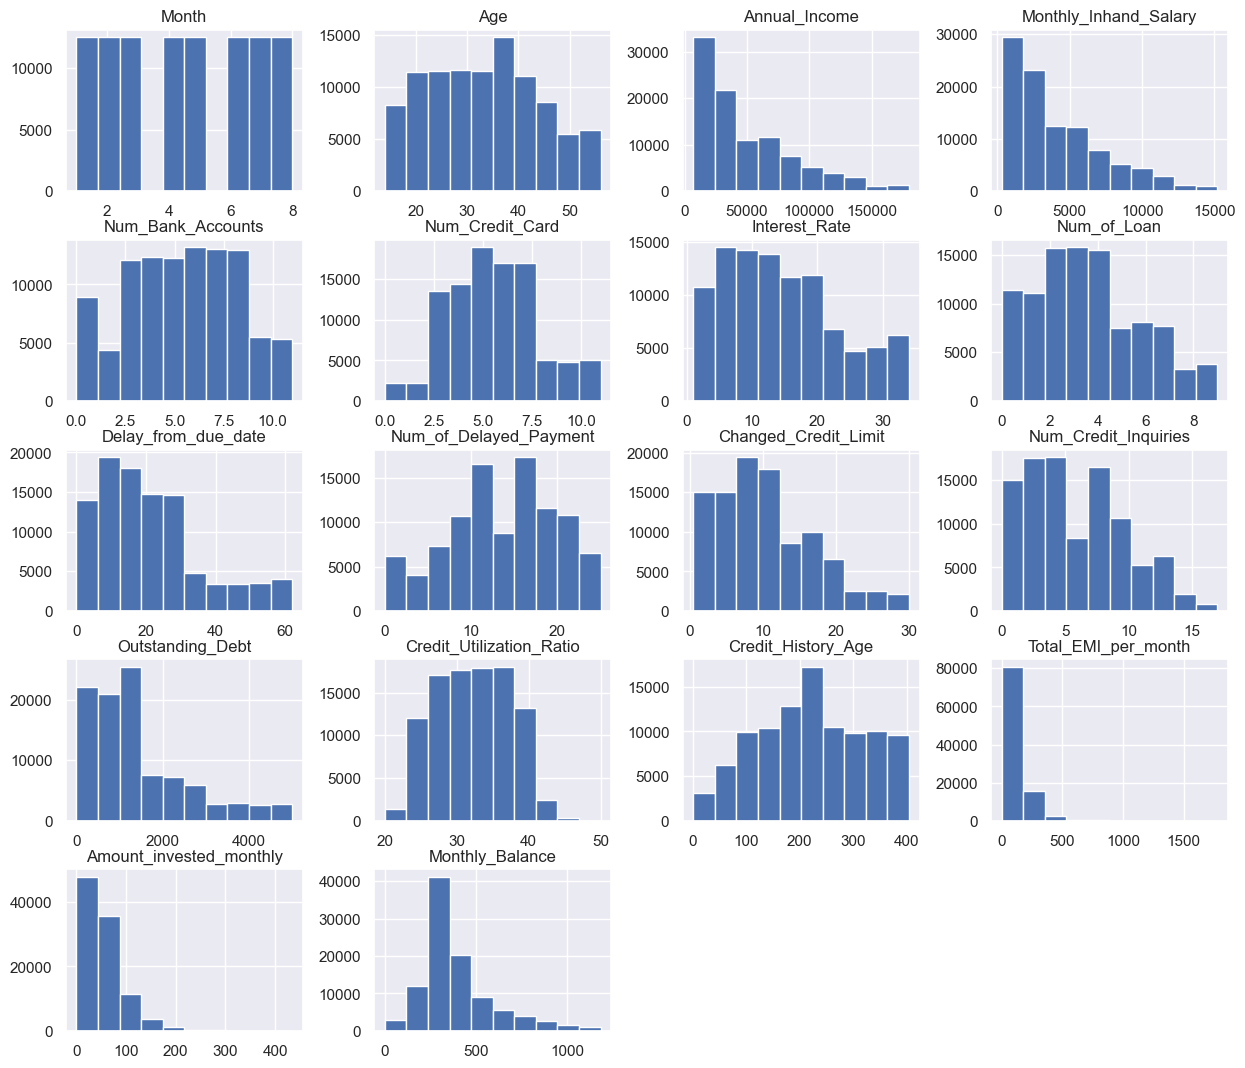

In [16]:
#Distribution of data
freqgraph = data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(15, 13))
plt.show()

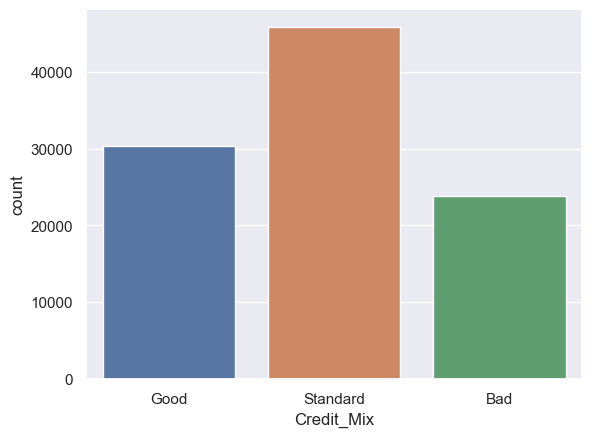

In [17]:
# Create a count plot
sns.countplot(x='Credit_Mix', data=data)
# Show the plot
plt.show()

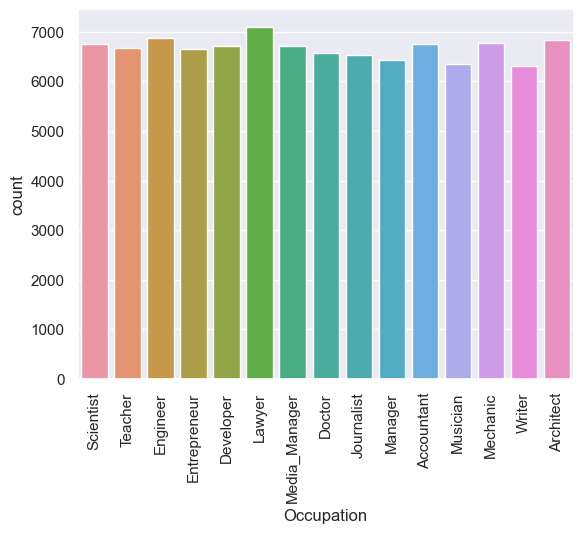

In [18]:
# Create a count plot
sns.countplot(x='Occupation', data=data)
plt.xticks(rotation=90);

# Show the plot
plt.show()

Bi variate analysis

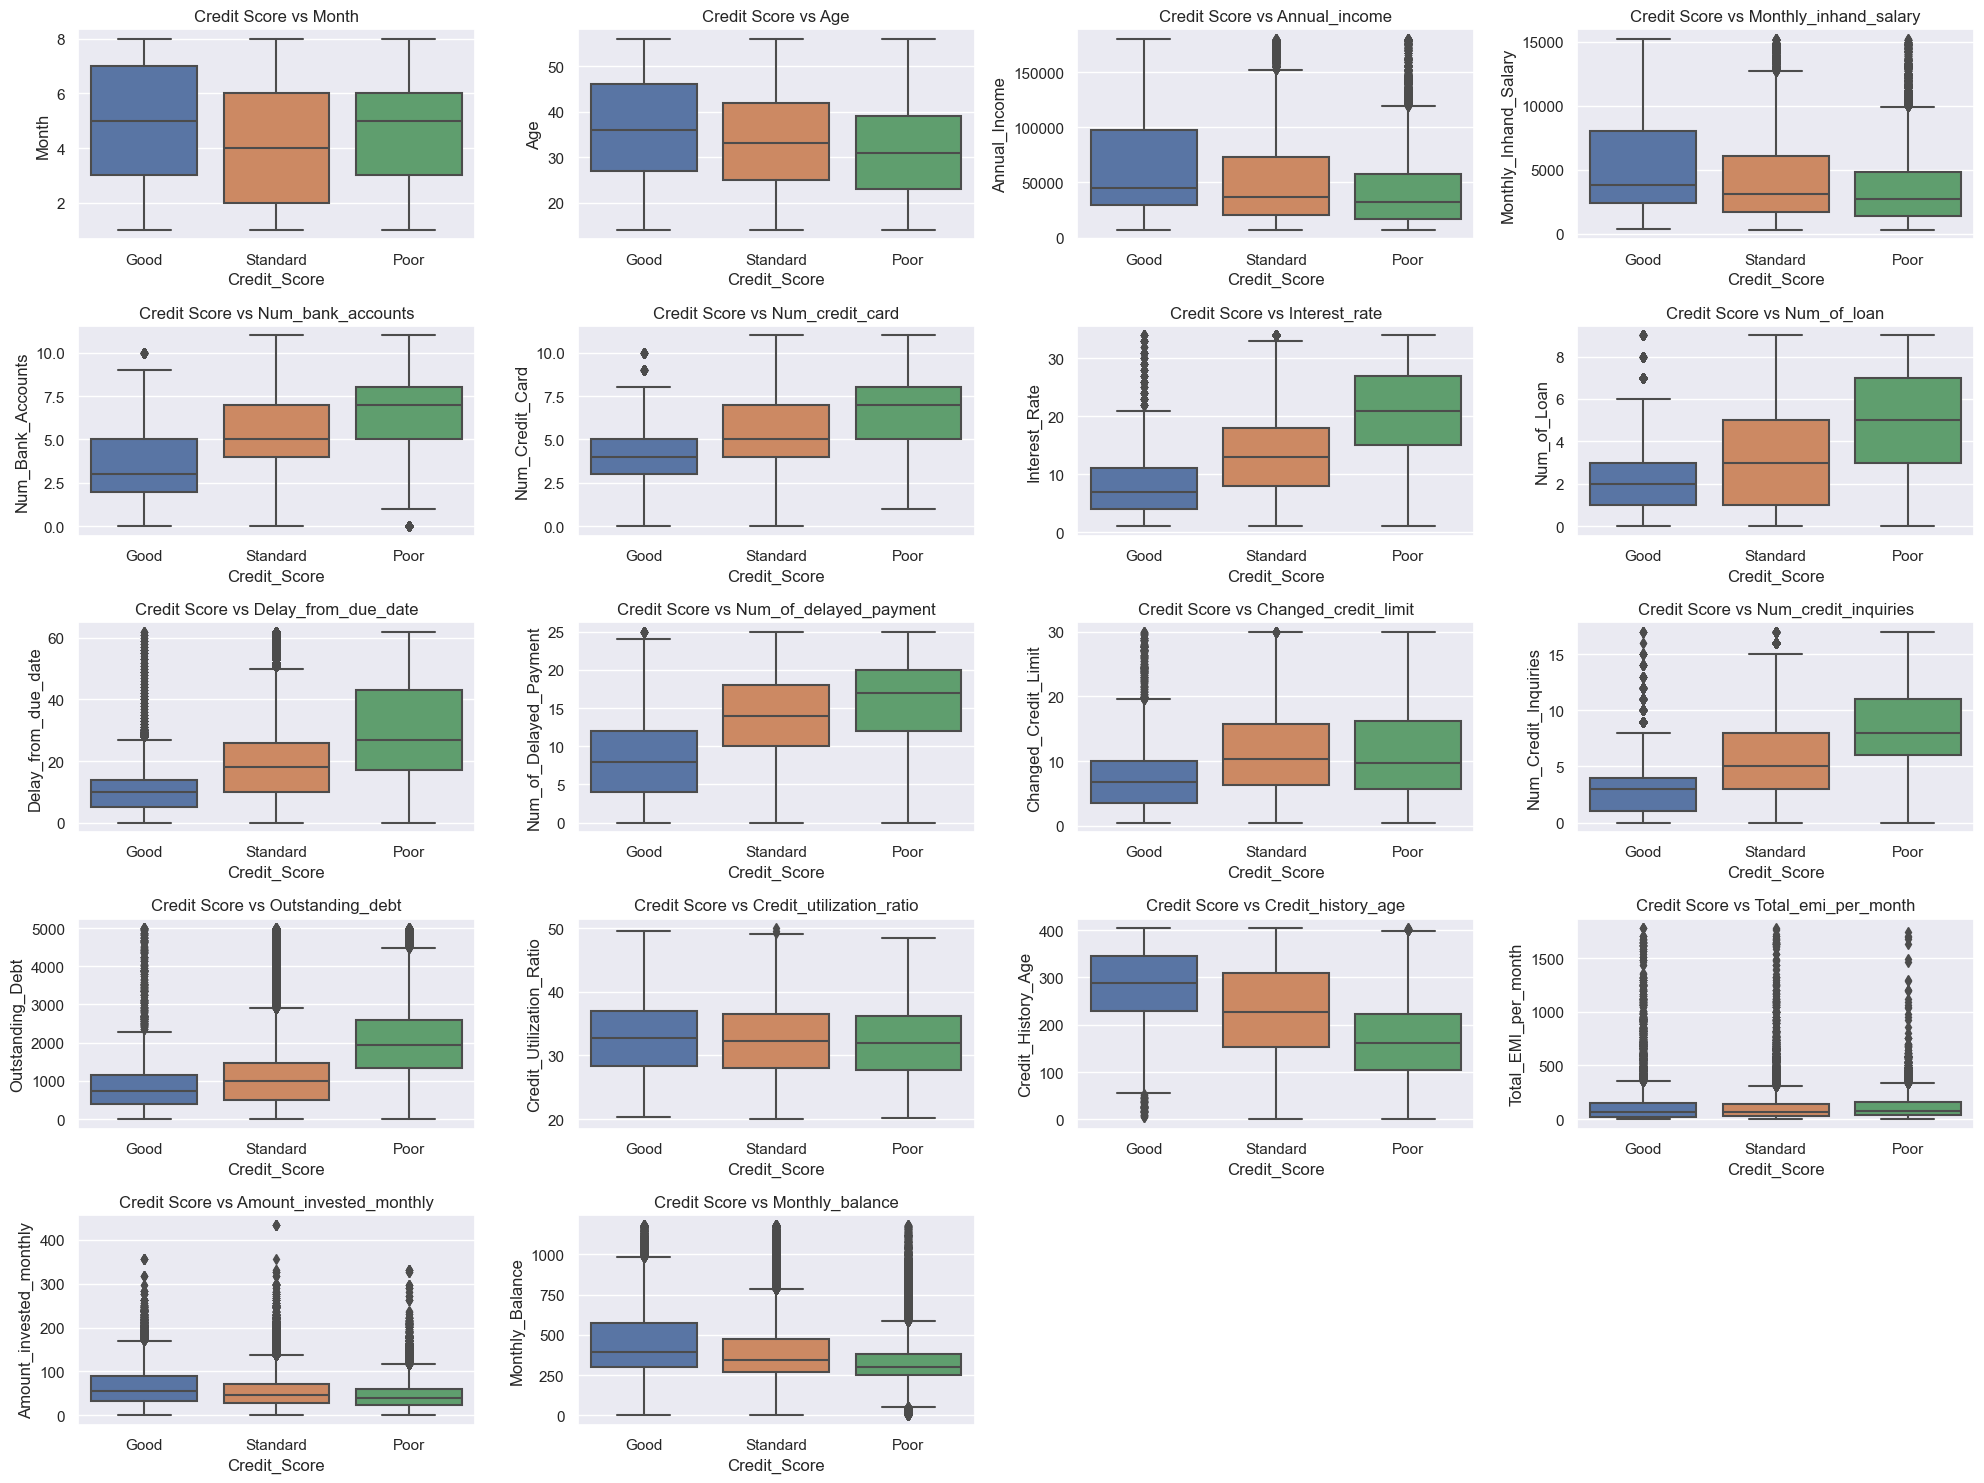

In [19]:
#box plot numerical columns
# Features to plot
features = data.select_dtypes(include=['float64','int64'])
# Create box plots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 4, i)  # Create a 2x2 grid of plots
    if data[feature].dtype == 'object':  # Categorical feature
        sns.boxplot(x=feature, y='Credit_Score', data=data)
    else:  # Continuous feature
        sns.boxplot(x='Credit_Score', y=feature, data=data)
    plt.title(f'Credit Score vs {feature.capitalize()}')

plt.tight_layout()
plt.show()

Insights:
* Credit score is better for persons have higher annual income.
* Similar to annual income, a higher monthly in-hand salary leads to a better credit score.
* If no of bank accounts higher credit score will be poor.
* Similar to bank accounts no of credit cards also negatively effect credit score.
* Interest rate,no of loans,delay fro due date,no of delayed payments and outstanding debt also negatively effect credit score.
* Credit utilization ratio doesn’t affect your credit scores.
* Having a long credit history results in better credit scores.
* Emi per month and monthly invested amount are not effecting


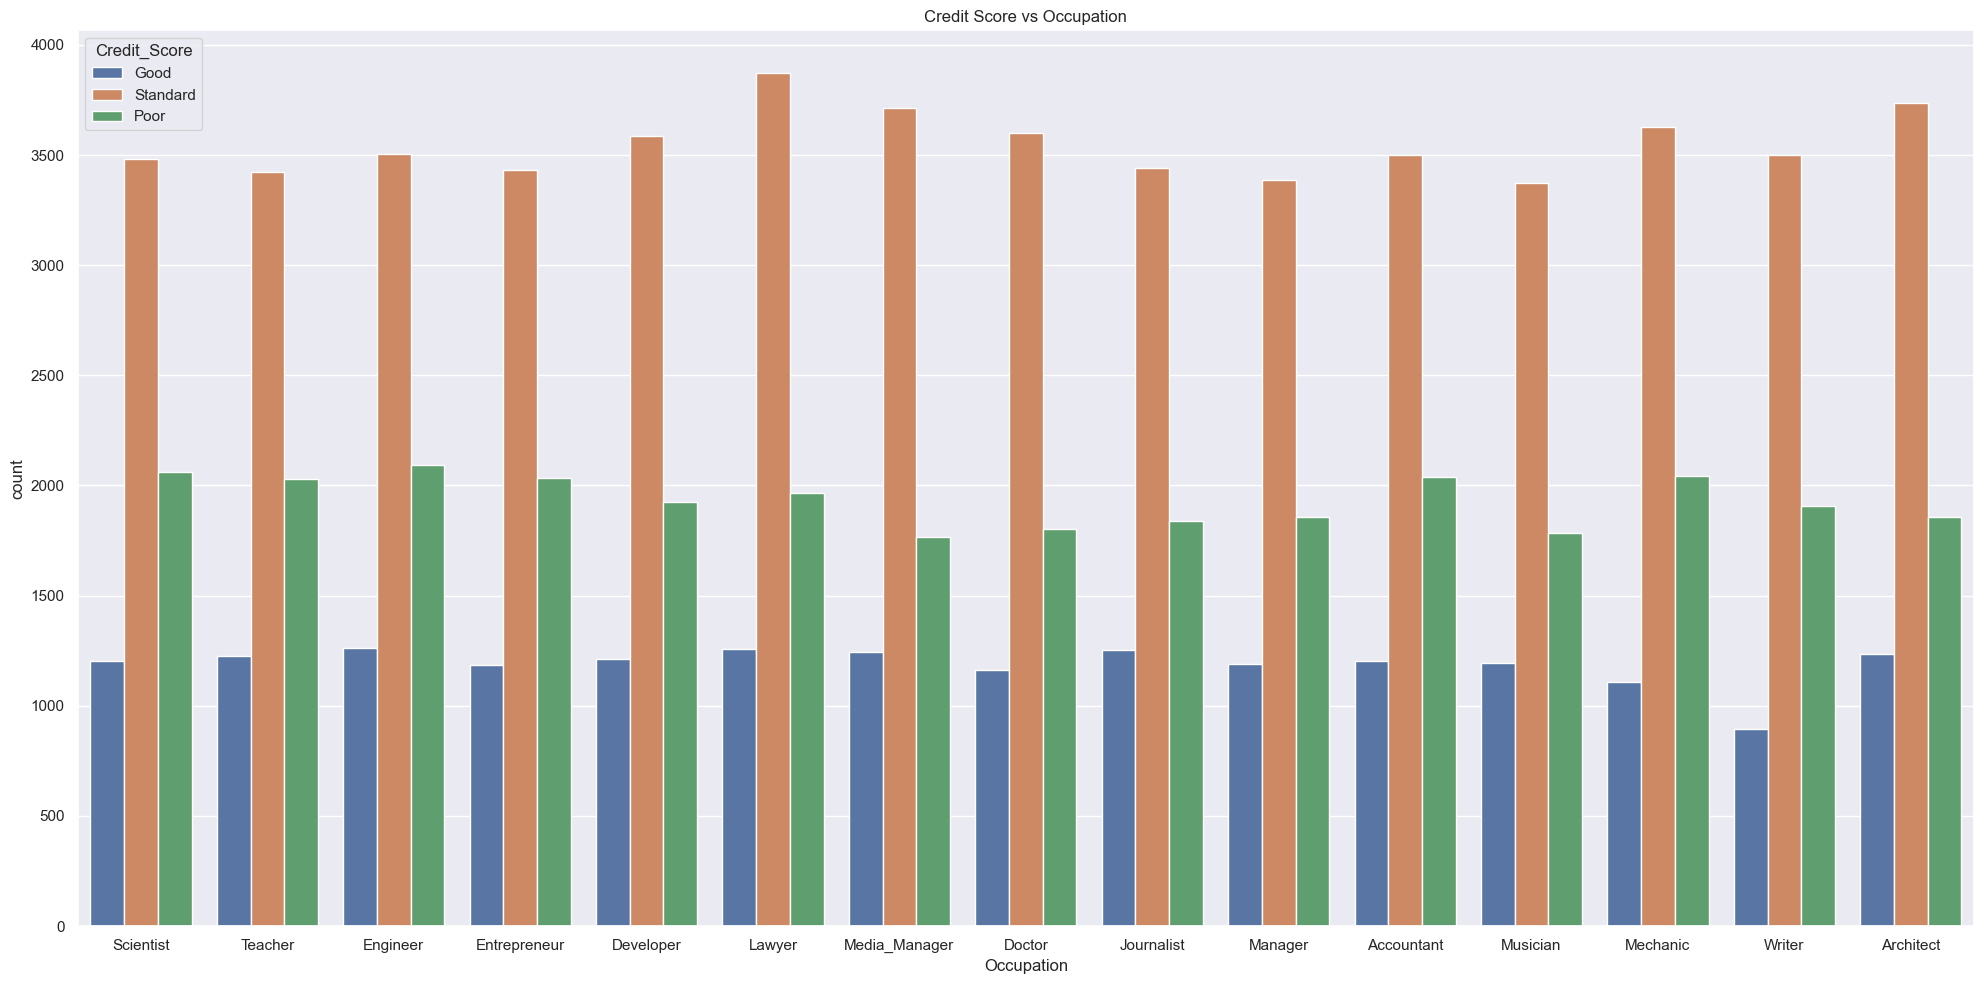

In [20]:
#Plot Credit score vs occupation
plt.figure(figsize=(20, 10))
sns.countplot(x='Occupation', hue='Credit_Score', data=data)
plt.title('Credit Score vs Occupation')
plt.tight_layout()
plt.show()
    

According to above graph ,Credit score not depending occupation.Almost same for all jobs.

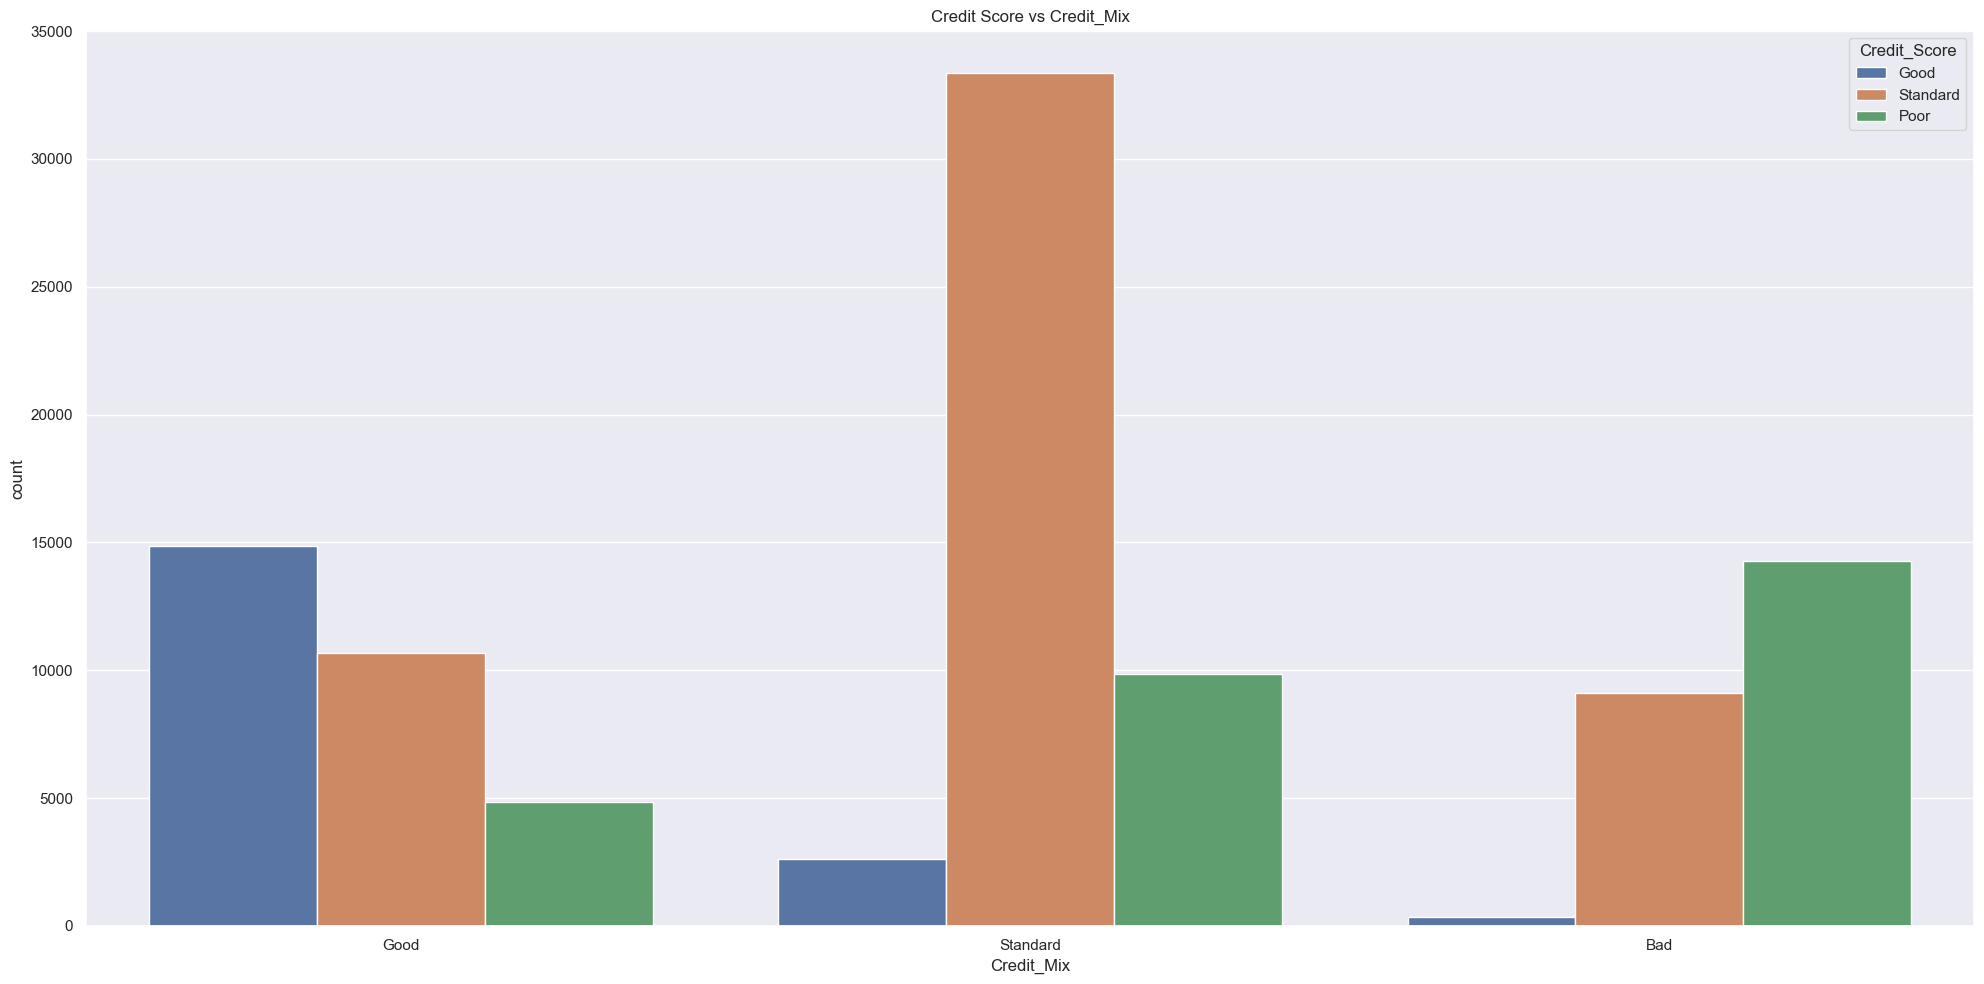

In [21]:
#Plot Credit score vs Credit mix
plt.figure(figsize=(20, 10))
sns.countplot(x='Credit_Mix', hue='Credit_Score', data=data)
plt.title('Credit Score vs Credit_Mix')
plt.tight_layout()
plt.show()

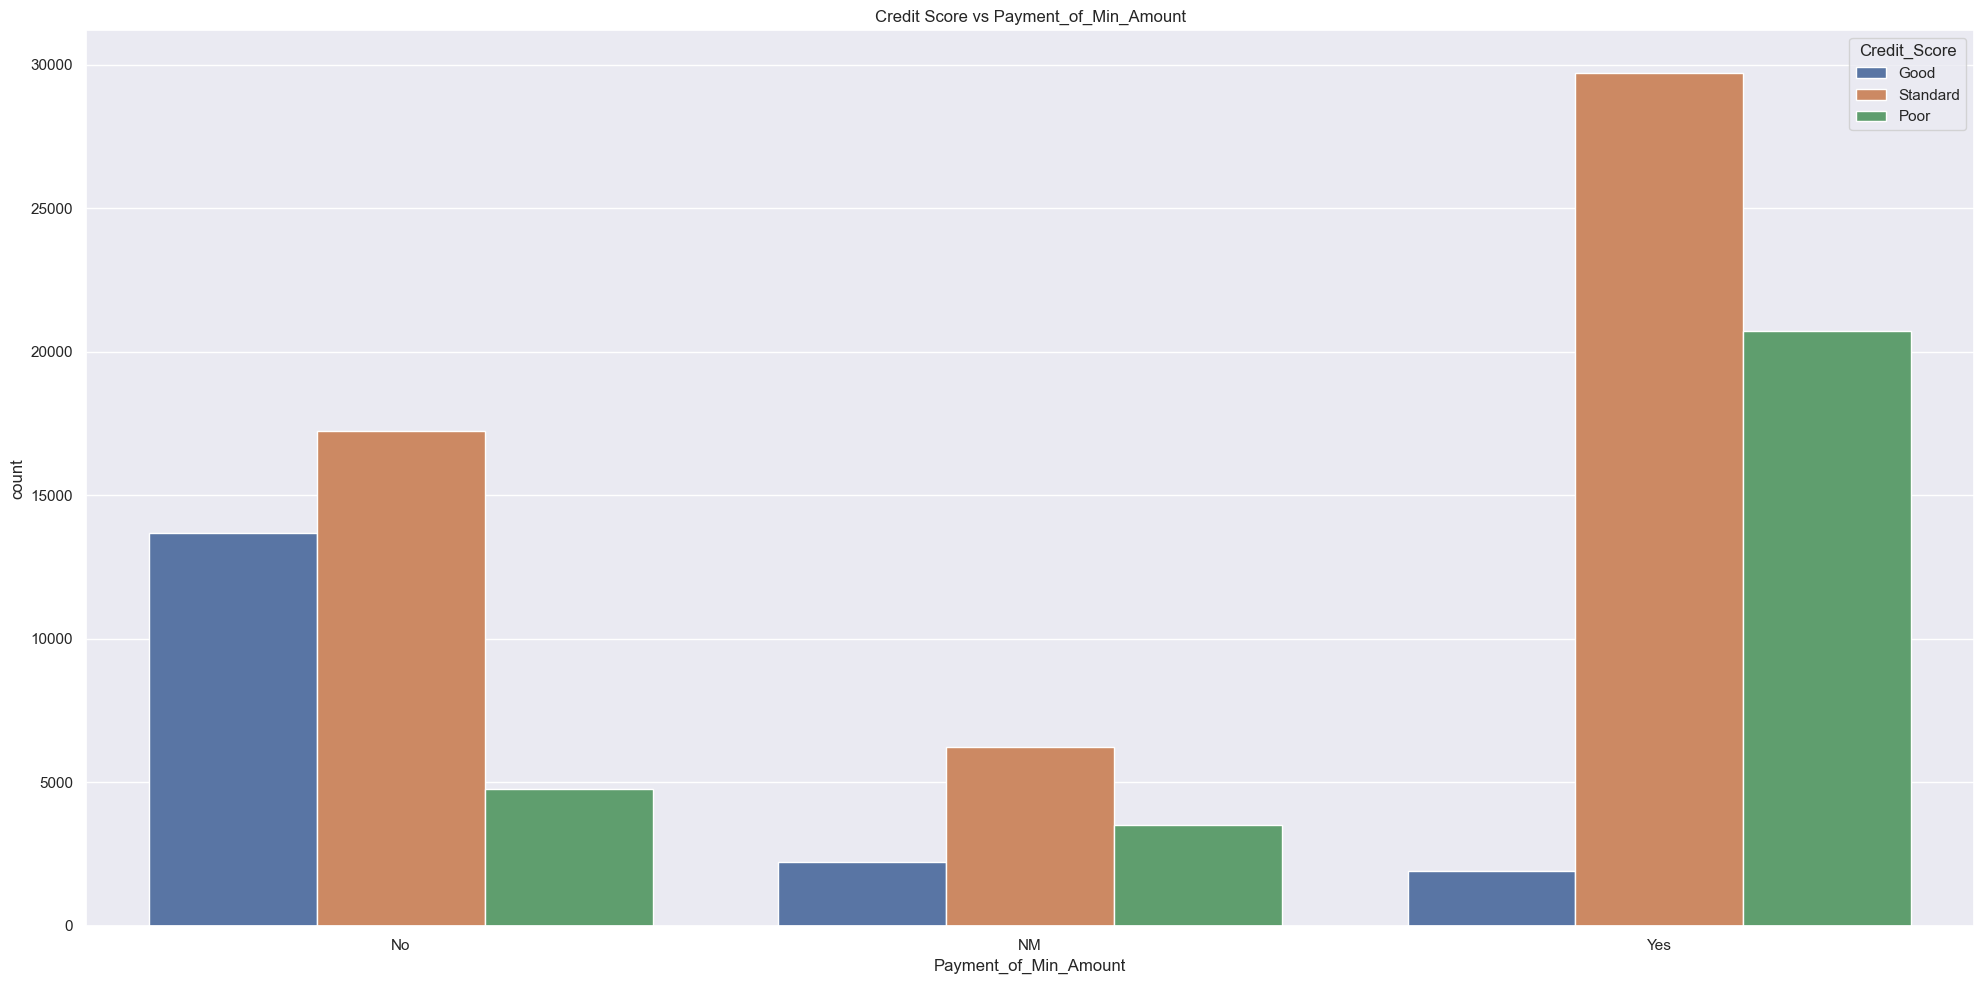

In [22]:
#Plot Credit score vs Payment_of_Min_Amount
plt.figure(figsize=(20, 10))
sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=data)
plt.title('Credit Score vs Payment_of_Min_Amount')
plt.tight_layout()
plt.show()

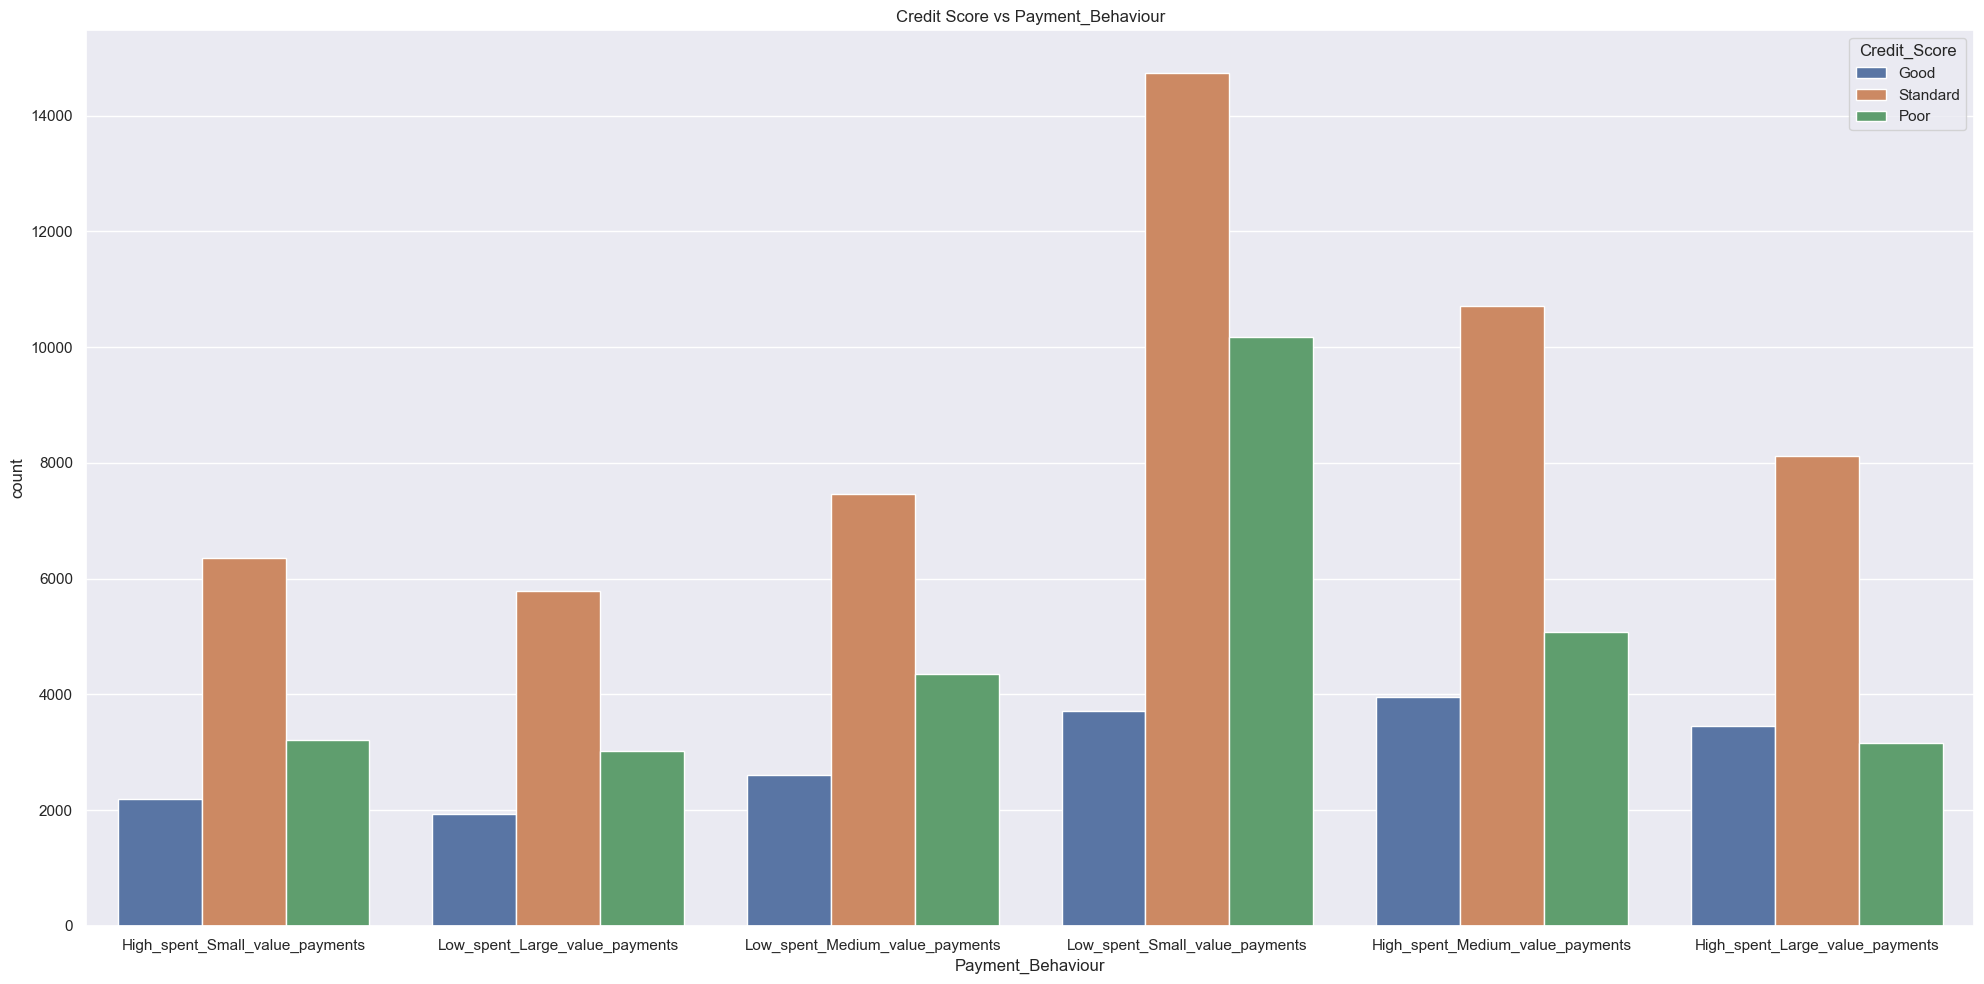

In [23]:
#Plot Credit score vs Payment_Behaviour
plt.figure(figsize=(20, 10))
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=data)
plt.title('Credit Score vs Payment_Behaviour')
plt.tight_layout()
plt.show()

Plot correlation map


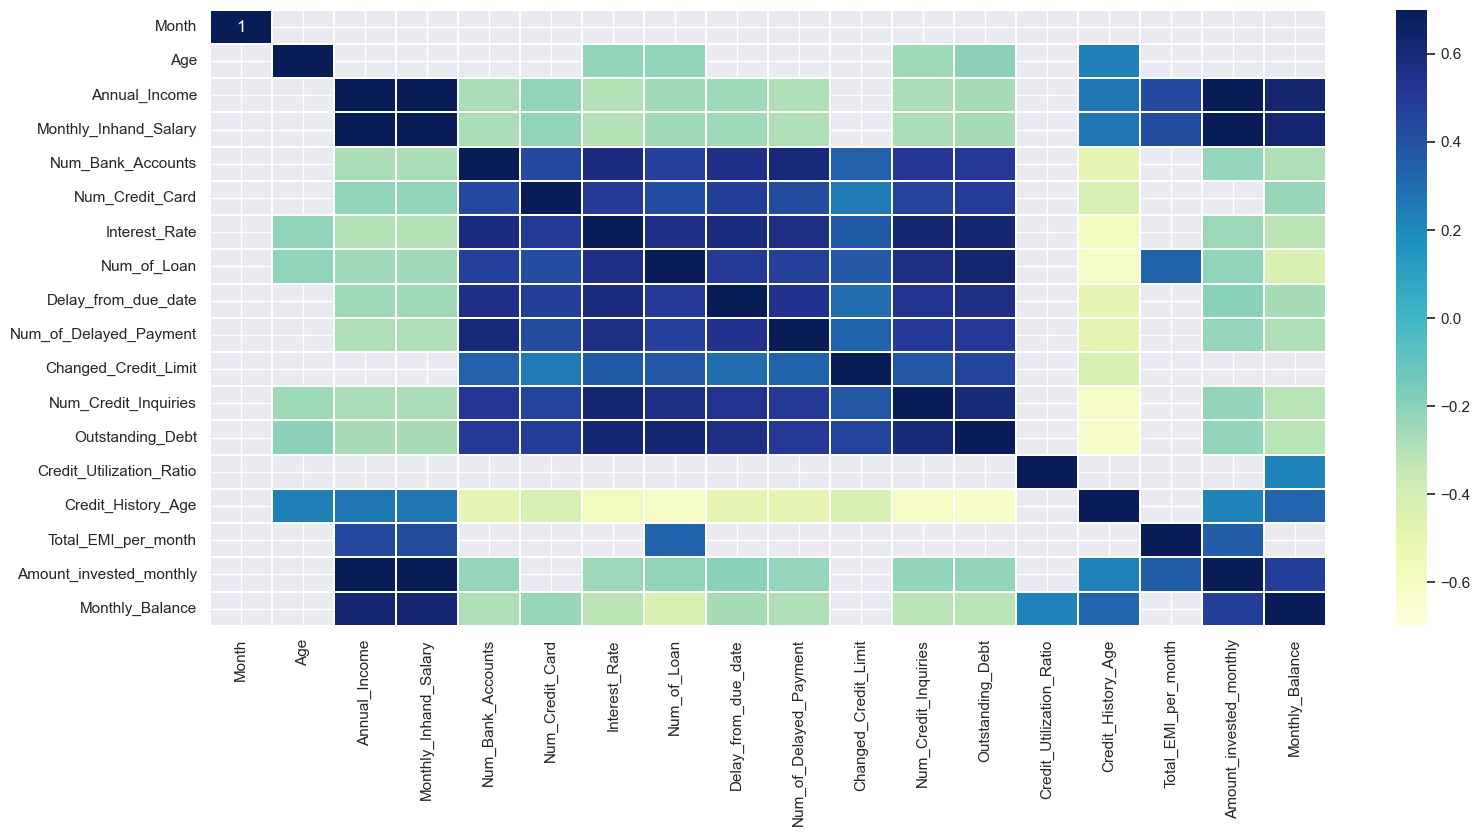

In [24]:
corr = data.select_dtypes(include = ['float64','int64']).corr()
mask = (corr <= 0.2) & (corr >= -0.2)
plt.subplots(figsize = (18,8))
sns.heatmap(corr.mask(mask),vmin=-0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')
plt.show()

In [25]:
# Find pairs of highly correlated features
threshold = 0.8
high_corr_pairs = [(corr.columns[i], corr.columns[j]) 
                   for i in range(len(corr.columns)) 
                   for j in range(i+1, len(corr.columns)) 
                   if corr.iloc[i, j] > threshold]
high_corr_pairs

[('Annual_Income', 'Monthly_Inhand_Salary'),
 ('Annual_Income', 'Amount_invested_monthly'),
 ('Monthly_Inhand_Salary', 'Amount_invested_monthly')]

Annual income ,amount invested monthly and monthly inhand salary are highly correlated. Let's drop amount invested monthly and monthly inhand salary and retian Annual income.

In [26]:
#data.drop(['Monthly_Inhand_Salary','Amount_invested_monthly'],axis=1,inplace=True)

# Data Preprocessing

In [27]:
#Checking missing values
data.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

No Null Values to handle

Outlier handling

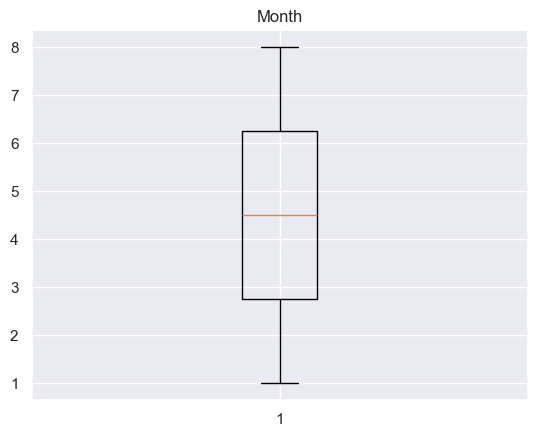

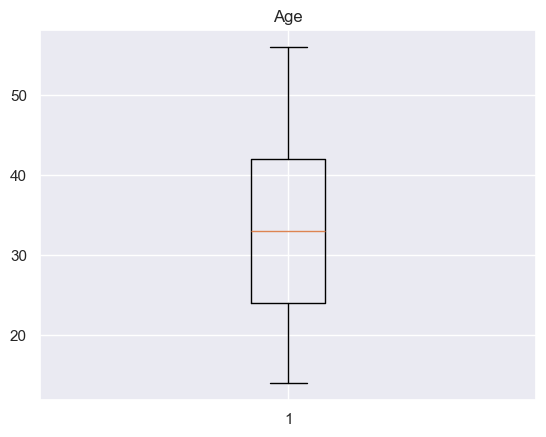

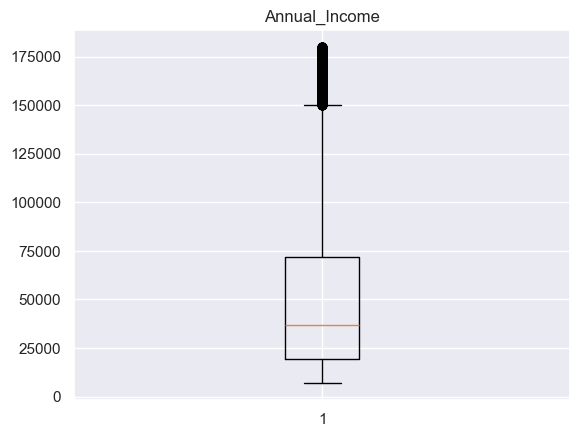

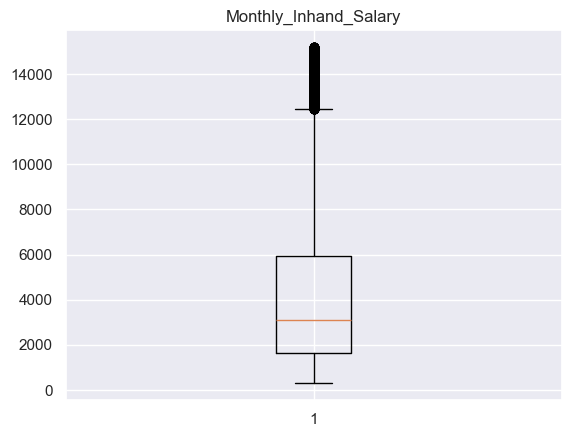

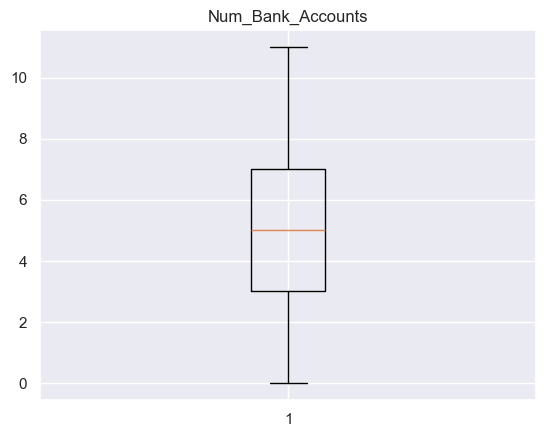

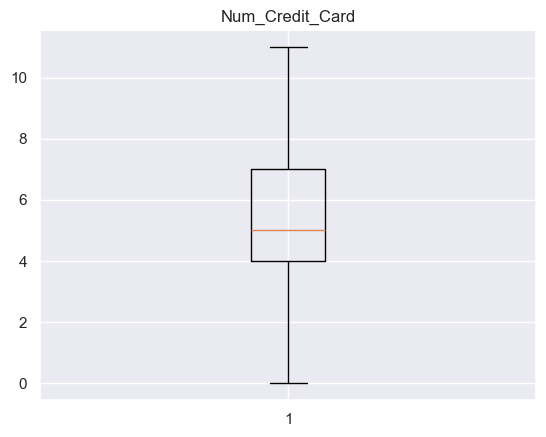

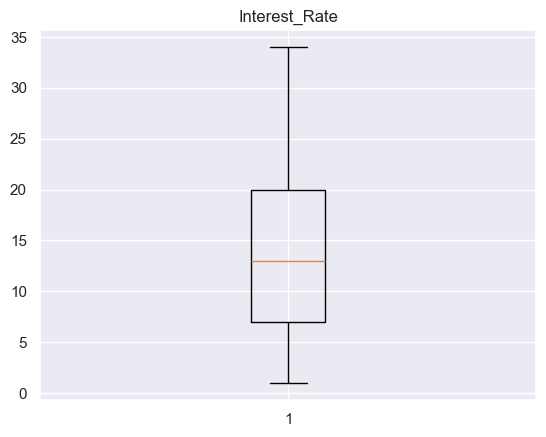

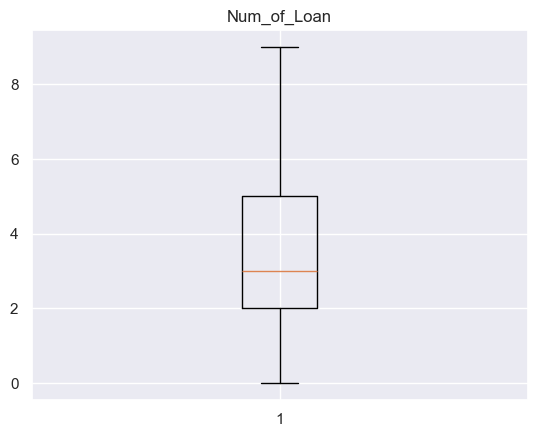

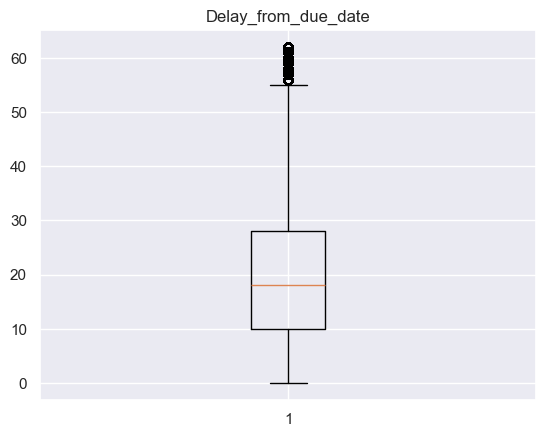

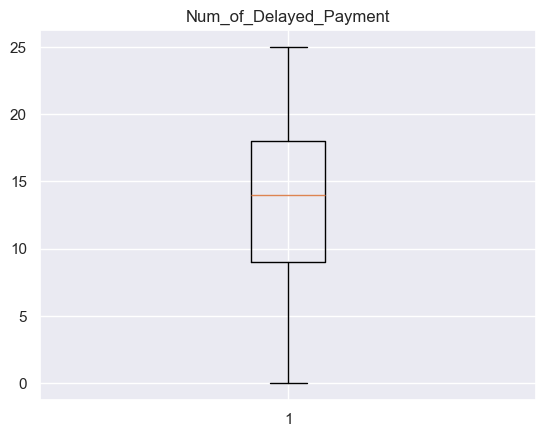

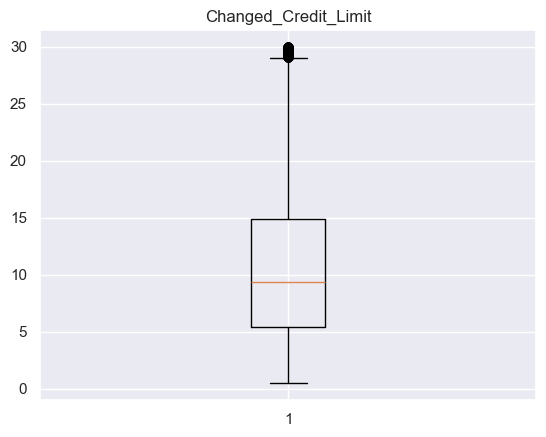

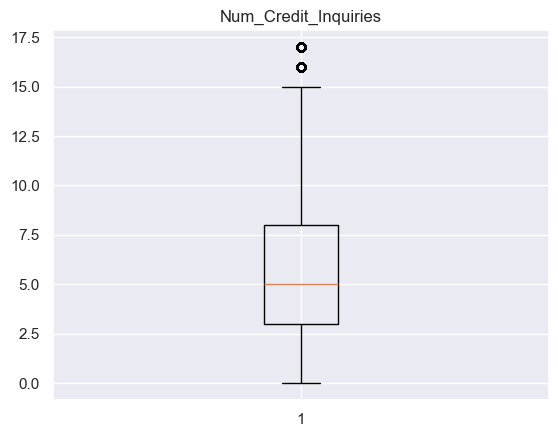

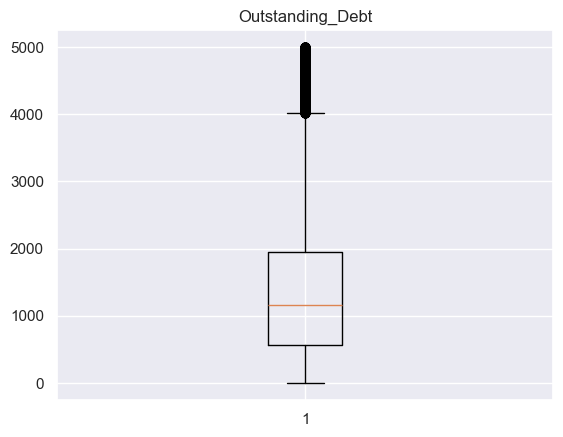

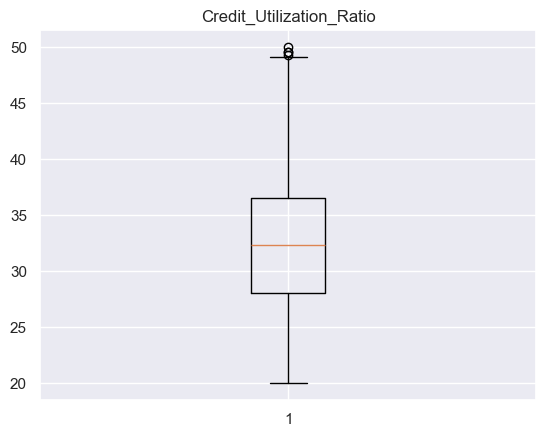

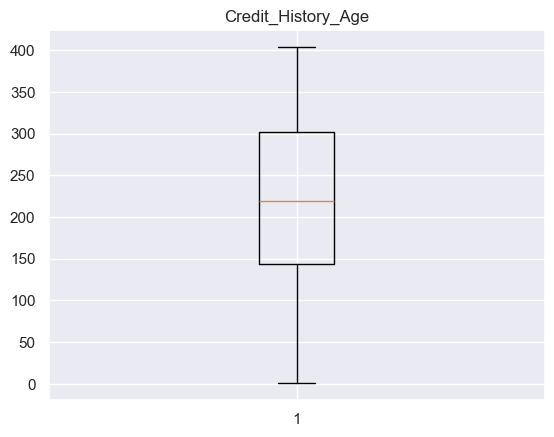

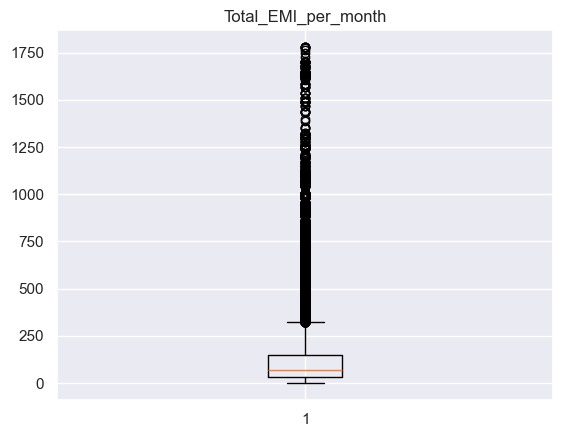

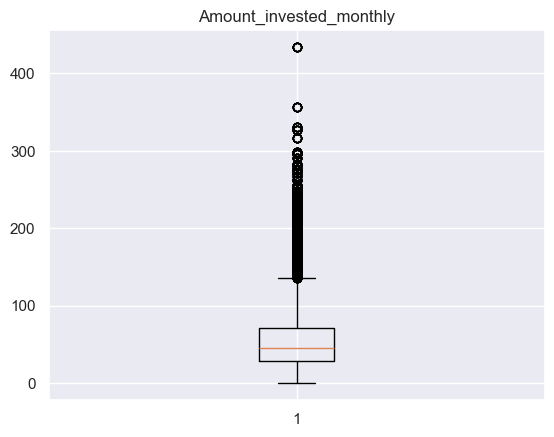

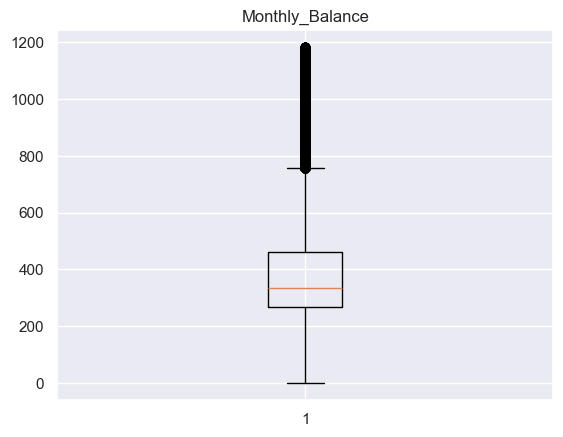

In [28]:
num_columns=data.select_dtypes(include=['float64','int64'])
for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)


We decided to keep outliers. So we are using models that can handle outlier.

In [29]:
#The Credit_Mix column is valuable for determining credit scores.It is categorical, let's convert into numerical by assigning values 0,1,2 
# Before transformation
data['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [30]:
data_copy=data.copy()


In [31]:
#Transforming the column in 0, 1, or 2.
data['Credit_Mix'] = data['Credit_Mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

In [32]:
# After transformation
data['Credit_Mix'].unique()

array([2, 1, 0], dtype=int64)

In [33]:
data['Credit_Score'] = data['Credit_Score'].map({'Good': 2, 'Standard': 1, 'Poor': 0})

In [34]:
data['Credit_Score'].unique()

array([2, 1, 0], dtype=int64)

In [35]:
data['Num_Credit_Card'].replace(0,1,inplace=True)


# Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#data['Credit_Score'] = le.fit_transform(data['Credit_Score'])
data['Type_of_Loan'] = le.fit_transform(data['Type_of_Loan'])
#data['Occupation'] = le.fit_transform(data['Occupation'])

Occupation has 15 values and Type_of_Loan has 6261 unique values so we done label encoding.

In [37]:
obj_columns = data.select_dtypes(include=['object']).columns
print(obj_columns)
exclude_columns = ['Type_of_Loan']
categorical_columns = [col for col in obj_columns if col not in exclude_columns]

encoder ={}
for col in categorical_columns:
    oe = OneHotEncoder(drop='first', sparse_output=False, dtype=int)
    transformed_data = oe.fit_transform(data[[col]])
    transformed_df = pd.DataFrame(transformed_data, columns=oe.get_feature_names_out([col]))
    
    # Drop the original column and concatenate the new one-hot encoded columns
    data = data.drop(col, axis=1).join(transformed_df)
    encoder[col] = oe


Index(['Occupation', 'Payment_of_Min_Amount', 'Payment_Behaviour'], dtype='object')


In [38]:
data.head(15)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,2,809.98,26.822620,265.0,49.574949,21.465380,312.494089,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,4.0,11.27,4.0,2,809.98,31.944960,266.0,49.574949,21.465380,284.629162,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,2,809.98,28.609352,267.0,49.574949,21.465380,331.209863,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,5.0,4.0,6.27,4.0,2,809.98,31.377862,268.0,49.574949,21.465380,223.451310,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,6.0,4.0,11.27,4.0,2,809.98,24.797347,269.0,49.574949,21.465380,341.489231,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
5,6,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,8.0,4.0,9.27,4.0,2,809.98,27.262259,270.0,49.574949,21.465380,340.479212,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
6,7,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,8.0,11.27,4.0,2,809.98,22.537593,271.0,49.574949,21.465380,244.565317,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
7,8,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,6.0,11.27,4.0,2,809.98,23.933795,272.0,49.574949,21.465380,358.124168,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
8,1,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,684,3.0,4.0,5.42,2.0,2,605.03,24.464031,319.0,18.816215,39.684018,470.690627,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
9,2,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,684,7.0,1.0,7.42,2.0,2,605.03,38.550848,320.0,18.816215,39.684018,484.591214,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [39]:
data.shape

(100000, 42)

Let’s split the data into the target and feature variables.


In [40]:
data.columns


Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Score', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_pa

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int64  
 1   Age                                                 100000 non-null  float64
 2   Annual_Income                                       100000 non-null  float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  float64
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         100000 non-null  float64
 8   Type_of_Loan                                        100000 non-nu

In [42]:
#data['Total_Num_Accounts'] = data['Num_Bank_Accounts'] + data['Num_Credit_Card']

# Calculate the total outstanding debt per account

data['Debt_Per_Card'] = data['Outstanding_Debt'] / data['Num_Credit_Card']

# Calculate the ratio of outstanding debt to annual income

data['Debt_to_Income_Ratio'] = data['Outstanding_Debt'] / data['Annual_Income']

# Calculate the total number of delayed payments per account

data['Delayed_Payments_Per_Card'] = data['Num_of_Delayed_Payment'] / data['Num_Credit_Card']

# Calculate the total monthly expenses (EMI + Monthly Investments) 

data['Total_Monthly_Expenses'] = data['Total_EMI_per_month'] + data['Amount_invested_monthly']

data['Debt_Per_Account'] = round(data['Outstanding_Debt'] / data['Num_Bank_Accounts'])
data['Debt_to_Income_Ratio'] = round(data['Outstanding_Debt'] / data['Annual_Income'])
data['Delayed_Payments_Per_Account'] = round(data['Num_of_Delayed_Payment'] / data['Num_Bank_Accounts'])


In [43]:
data.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Debt_Per_Card,Debt_to_Income_Ratio,Delayed_Payments_Per_Card,Total_Monthly_Expenses
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,2,809.98,26.822620,265.0,49.574949,21.46538,312.494089,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,202.495,0.042376,1.75,71.040329
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,4.0,11.27,4.0,2,809.98,31.944960,266.0,49.574949,21.46538,284.629162,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,202.495,0.042376,1.00,71.040329
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,2,809.98,28.609352,267.0,49.574949,21.46538,331.209863,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,202.495,0.042376,1.75,71.040329
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,5.0,4.0,6.27,4.0,2,809.98,31.377862,268.0,49.574949,21.46538,223.451310,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,202.495,0.042376,1.00,71.040329
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,6.0,4.0,11.27,4.0,2,809.98,24.797347,269.0,49.574949,21.46538,341.489231,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,202.495,0.042376,1.00,71.040329


In [44]:
data.drop(['Monthly_Inhand_Salary','Amount_invested_monthly'],axis=1,inplace=True)

In [45]:
x = data.drop(columns = ['Credit_Score'],axis=1)
y = data['Credit_Score']


 # Divide the data into training, validation, and testing sets

In [46]:
from sklearn.model_selection import train_test_split
x_train_val,x_test,y_train_val,y_test= train_test_split(x,y,random_state=42,test_size=.2)
x_train,x_val,y_train,y_val= train_test_split(x_train_val,y_train_val,random_state=42,test_size=.25)

In [47]:
print(f'Train set size: {len(x_train)}')
print(f'Validation set size: {len(x_val)}')
print(f'Test set size: {len(x_test)}')

Train set size: 60000
Validation set size: 20000
Test set size: 20000


In [48]:
#Do Standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [49]:
cat_cols = data_copy.select_dtypes(include = ['float64','int64']).columns
cat_cols = cat_cols.drop(['Monthly_Inhand_Salary','Amount_invested_monthly'])
print(cat_cols)

Index(['Month', 'Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Monthly_Balance'],
      dtype='object')


In [50]:
x_train_sc = x_train.copy()
x_val_sc = x_val.copy()
x_test_sc = x_test.copy()

x_train_sc[cat_cols] = sc.fit_transform(x_train[cat_cols])
x_val_sc[cat_cols] = sc.fit_transform(x_val[cat_cols])
x_test_sc[cat_cols] = sc.fit_transform(x_test[cat_cols])


# 1.Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, class_weight='balanced')


In [52]:
model.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300)

Validate the model

In [53]:
val_predictions = model.predict(x_val)


In [54]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [55]:
print('Classification Report', classification_report(y_val, val_predictions))
print('\n')
print('Confusion Matrix', confusion_matrix(y_val, val_predictions))
print('\n')
print('Accuracy Score', accuracy_score(y_val, val_predictions))

Classification Report               precision    recall  f1-score   support

           0       0.80      0.83      0.82      5708
           1       0.84      0.82      0.83     10767
           2       0.79      0.78      0.78      3525

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000



Confusion Matrix [[4757  933   18]
 [1157 8881  729]
 [  24  763 2738]]


Accuracy Score 0.8188


In [56]:
# Test the model
test_predictions = model.predict(x_test)

In [57]:
print('Classification Report', classification_report(y_test, test_predictions))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, test_predictions))
print('\n')
print('Accuracy Score', accuracy_score(y_test, test_predictions))

Classification Report               precision    recall  f1-score   support

           0       0.81      0.84      0.82      5874
           1       0.83      0.83      0.83     10599
           2       0.80      0.77      0.78      3527

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000



Confusion Matrix [[4915  936   23]
 [1157 8772  670]
 [  12  808 2707]]


Accuracy Score 0.8197


In [58]:
result = pd.DataFrame({'Model': ['Random Forest'], 'Accuracy':[accuracy_score(y_test, test_predictions)]})


In [59]:
#Using scaled data
model.fit(x_train_sc, y_train)
val_predictions_sc = model.predict(x_val_sc)
print('Classification Report', classification_report(y_val, val_predictions_sc))
print('\n')
print('Confusion Matrix', confusion_matrix(y_val, val_predictions_sc))
print('\n')
print('Accuracy Score', accuracy_score(y_val, val_predictions_sc))

Classification Report               precision    recall  f1-score   support

           0       0.80      0.83      0.81      5708
           1       0.83      0.83      0.83     10767
           2       0.78      0.77      0.77      3525

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000



Confusion Matrix [[4728  956   24]
 [1165 8884  718]
 [  26  802 2697]]


Accuracy Score 0.81545


In [60]:
test_predictions_sc = model.predict(x_test_sc)
print('Classification Report', classification_report(y_test, test_predictions_sc))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, test_predictions_sc))
print('\n')
print('Accuracy Score', accuracy_score(y_test, test_predictions_sc))

Classification Report               precision    recall  f1-score   support

           0       0.81      0.83      0.82      5874
           1       0.83      0.83      0.83     10599
           2       0.79      0.76      0.78      3527

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000



Confusion Matrix [[4892  951   31]
 [1158 8768  673]
 [  16  828 2683]]


Accuracy Score 0.81715


# 2.logistic regression model

In [61]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)


In [62]:
log_reg.fit(x_train,y_train)


LogisticRegression(max_iter=1000)

In [63]:
y_log_pred_val = log_reg.predict(x_val)
y_log_pred_test = log_reg.predict(x_test)

In [64]:
print('Classification Report', classification_report(y_val, y_log_pred_val))
print('\n')
print('Confusion Matrix', confusion_matrix(y_val, y_log_pred_val))
print('\n')
print('Accuracy Score', accuracy_score(y_val, y_log_pred_val))

Classification Report               precision    recall  f1-score   support

           0       0.63      0.43      0.51      5708
           1       0.60      0.83      0.70     10767
           2       0.64      0.22      0.33      3525

    accuracy                           0.61     20000
   macro avg       0.62      0.50      0.51     20000
weighted avg       0.62      0.61      0.58     20000



Confusion Matrix [[2465 3177   66]
 [1411 8988  368]
 [  49 2702  774]]


Accuracy Score 0.61135


In [65]:
print('Classification Report', classification_report(y_test, y_log_pred_test))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, y_log_pred_test))
print('\n')
print('Accuracy Score', accuracy_score(y_test, y_log_pred_test))

Classification Report               precision    recall  f1-score   support

           0       0.63      0.43      0.52      5874
           1       0.60      0.83      0.69     10599
           2       0.65      0.22      0.33      3527

    accuracy                           0.61     20000
   macro avg       0.63      0.49      0.51     20000
weighted avg       0.62      0.61      0.58     20000



Confusion Matrix [[2551 3264   59]
 [1422 8823  354]
 [  49 2712  766]]


Accuracy Score 0.607


In [66]:
result2 = pd.DataFrame({'Model': ['Logistic Regression'], 'Accuracy':[accuracy_score(y_test, y_log_pred_test)]})


# 3.KNN model

In [67]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
metric_k_val = []

neighbors = np.arange(3,15)

In [68]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn_val = classifier.predict(x_val)
  accuracy_val= accuracy_score(y_val,y_pred_knn_val)
  metric_k_val.append(accuracy_val)    
  y_pred_knn_test = classifier.predict(x_test)
  accuracy_test= accuracy_score(y_test,y_pred_knn_test)
  metric_k.append(accuracy_test)

Text(0, 0.5, 'accuracy')

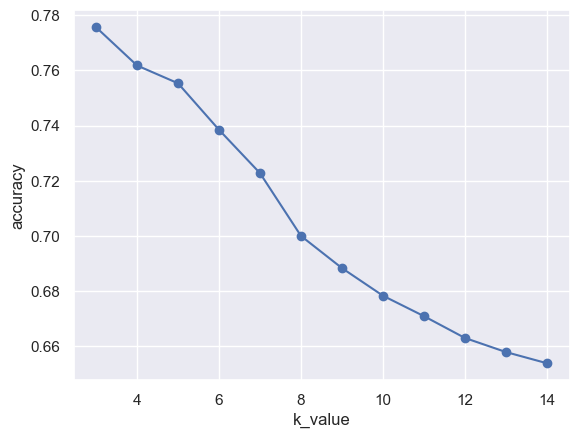

In [69]:
plt.plot(neighbors,metric_k_val,'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [70]:
classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2) #3 is the highest data point
classifier.fit(x_train,y_train)
y_pred_knn_val = classifier.predict(x_val)


In [71]:
print('Classification Report', classification_report(y_val, y_pred_knn_val))
print('\n')
print('Confusion Matrix', confusion_matrix(y_val, y_pred_knn_val))
print('\n')
print('Accuracy Score', accuracy_score(y_val, y_pred_knn_val))

Classification Report               precision    recall  f1-score   support

           0       0.75      0.80      0.78      5708
           1       0.81      0.78      0.79     10767
           2       0.72      0.72      0.72      3525

    accuracy                           0.78     20000
   macro avg       0.76      0.77      0.76     20000
weighted avg       0.78      0.78      0.78     20000



Confusion Matrix [[4584 1109   15]
 [1437 8374  956]
 [  75  896 2554]]


Accuracy Score 0.7756


Text(0, 0.5, 'accuracy')

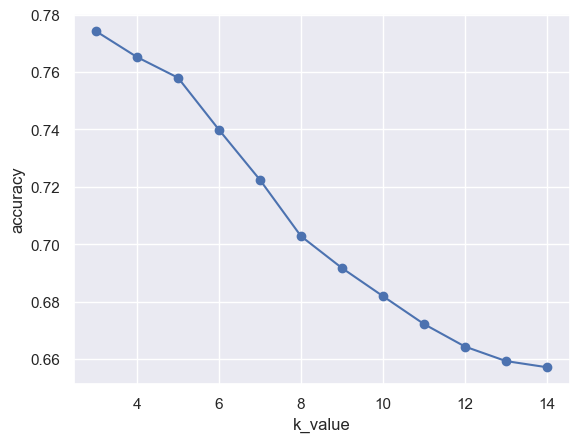

In [72]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [73]:
classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2) #3 is the highest data point
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)


In [74]:
print('Classification Report', classification_report(y_test, y_pred_knn))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, y_pred_knn))
print('\n')
print('Accuracy Score', accuracy_score(y_test, y_pred_knn))

Classification Report               precision    recall  f1-score   support

           0       0.76      0.81      0.78      5874
           1       0.80      0.77      0.79     10599
           2       0.72      0.72      0.72      3527

    accuracy                           0.77     20000
   macro avg       0.76      0.77      0.76     20000
weighted avg       0.77      0.77      0.77     20000



Confusion Matrix [[4746 1118   10]
 [1423 8204  972]
 [  59  934 2534]]


Accuracy Score 0.7742


In [75]:
result3 = pd.DataFrame({'Model': ['KNN'], 'Accuracy':[accuracy_score(y_test, y_pred_knn)]})


# 4.XGB

In [76]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=10, verbose=False)

# Validate the model
val_predictions = model.predict(x_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Test the model
test_predictions = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy:.2f}')

Validation Accuracy: 0.78
Test Accuracy: 0.78


In [77]:
result4 = pd.DataFrame({'Model': ['XGB'], 'Accuracy':[accuracy_score(y_test, test_predictions)]})


# 5.Bagging Classifier

In [78]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize base estimator
base_estimator = DecisionTreeClassifier()

# Initialize Bagging Classifier with base estimator
bagging_clf = BaggingClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Train Bagging Classifier
bagging_clf.fit(x_train, y_train)
# Validate model
y_pred_val = bagging_clf.predict(x_val)

# Make predictions
y_pred = bagging_clf.predict(x_test)

# Evaluate accuracy
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f'Accuracy of validation: {accuracy_val:.2f}')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy of validation: 0.81
Accuracy: 0.81


In [79]:
result5 = pd.DataFrame({'Model': ['BaggingClassifier'], 'Accuracy':[accuracy]})


In [80]:
# Append all result values
frames = [result, result2, result3,result4,result5]
results = pd.concat(frames,ignore_index=True)
results

,Model,Accuracy
0,Random Forest,0.81970
1,Logistic Regression,0.60700
2,KNN,0.77420
3,XGB,0.78070
4,BaggingClassifier,0.81315
